In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv('archives/dados_bacen.csv', index_col=0)
df

,Dólar (PTAX),Selic Diária (%),Selic Anual (%),IPCA Anual (%),Fed Rate (%)
2000-01-01,1.8003,0.069186,0.190399,0.0885,0.0545
2000-01-02,1.8003,0.069186,0.190399,0.0885,0.0545
2000-01-03,1.8003,0.069186,0.190399,0.0885,0.0545
2000-01-04,1.8329,0.069186,0.190399,0.0885,0.0545
2000-01-05,1.8536,0.069220,0.190501,0.0885,0.0545
...,...,...,...,...,...
2025-12-27,5.5407,0.055131,0.149000,0.0446,0.0372
2025-12-28,5.5407,0.055131,0.149000,0.0446,0.0372
2025-12-29,5.5733,0.055131,0.149000,0.0446,0.0372
2025-12-30,5.5018,0.055131,0.149000,0.0446,0.0372


In [35]:
import matplotlib.pyplot as plt

In [36]:
# Certifique-se de que a coluna de data é o índice e está no formato datetime
df.index = pd.to_datetime(df.index)

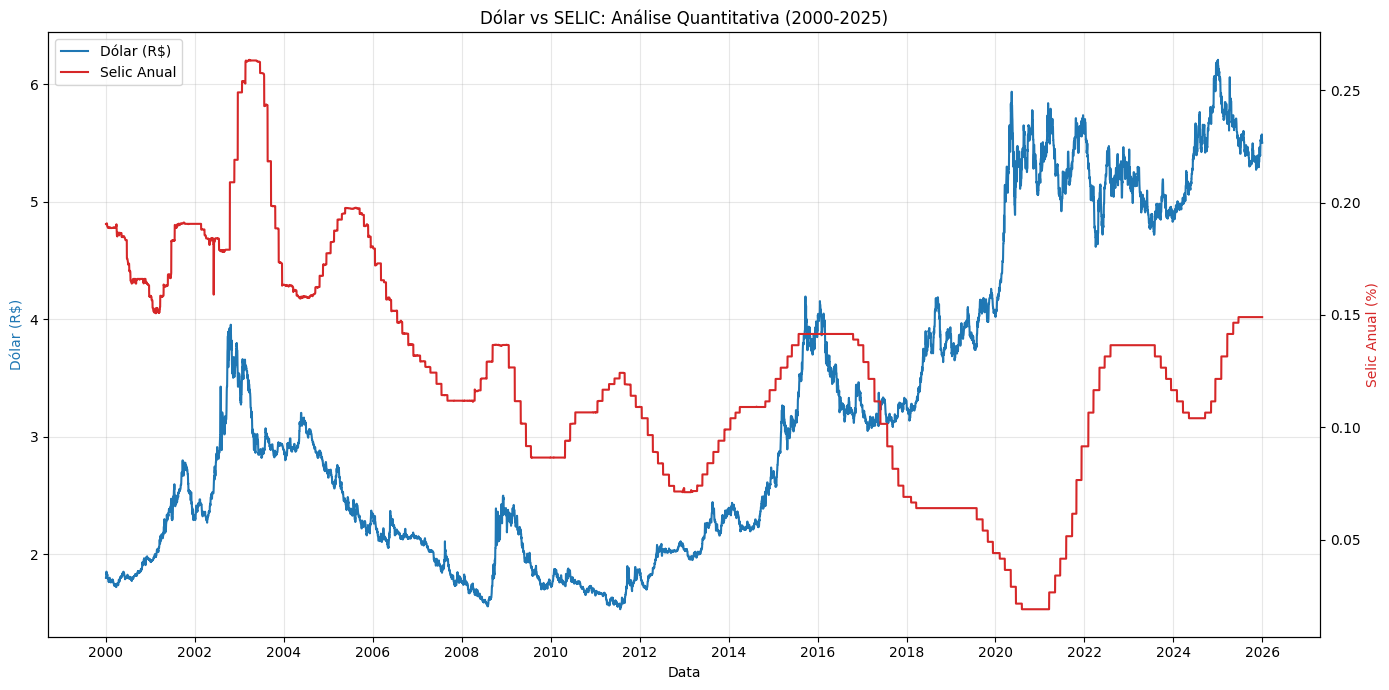

Correlação calculada: -0.2682


In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 4. Visualização
fig, ax1 = plt.subplots(figsize=(14, 7)) # Aumentei um pouco a largura para caber os rótulos

ax1.set_xlabel('Data')
ax1.set_ylabel('Dólar (R$)', color='tab:blue')
lns1 = ax1.plot(df.index, df['Dólar (PTAX)'], color='tab:blue', lw=1.5, label='Dólar (R$)')

# Criando o segundo eixo
ax2 = ax1.twinx()
ax2.set_ylabel('Selic Anual (%)', color='tab:red')
lns2 = ax2.plot(df.index, df['Selic Anual (%)'], color='tab:red', lw=1.5, label='Selic Anual')

# --- CONFIGURAÇÃO DO EIXO X (2 EM 2 ANOS) ---
ax1.xaxis.set_major_locator(mdates.YearLocator(2)) # Define o intervalo de 2 anos
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Formata para mostrar apenas o ano
plt.xticks(rotation=45) # Rotaciona para evitar sobreposição

# --- LEGENDA UNIFICADA ---
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

plt.title('Dólar vs SELIC: Análise Quantitativa (2000-2025)')
ax1.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Correlação calculada: {df.corr().iloc[0,1]:.4f}")

In [ ]:
df['Spread Fed-Selic'] = df['Fed Rate (%)'] - df['Selic Anual (%)']
df['Spread Fed-Selic'].mean()

np.float64(-0.10394030787141254)

In [52]:
import numpy as np
import pandas as pd

# 1. Primeiro, garanta que os dados originais estão limpos
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Dólar (PTAX)', 'Selic Anual (%)'])

# 2. Calcule a correlação (Terceira Variável)
df['corr_selic_dolar'] = df['Dólar (PTAX)'].rolling(window=180, min_periods=180).corr(df['Selic Anual (%)'])

# 3. TRATAMENTO ESSENCIAL: Remova os NaNs gerados pelo cálculo móvel 
# ou preencha-os se não quiser perder linhas.
# Aqui removemos apenas as linhas onde a correlação não pôde ser calculada.
df = df.dropna(subset=['corr_selic_dolar'])

# 4. Para análise recente (como seus dados são diários, tail(24) são apenas ~1 mês)
# Se quiser os últimos 2 anos reais, use tail(504)
analise_recente = df.tail(500) 
print(analise_recente['corr_selic_dolar'])

2024-08-04   -0.738492
2024-08-05   -0.734291
2024-08-06   -0.732631
2024-08-07   -0.731270
2024-08-08   -0.729801
                ...   
2025-12-12   -0.135730
2025-12-13   -0.107291
2025-12-14   -0.092724
2025-12-15   -0.065999
2025-12-16         inf
Name: corr_selic_dolar, Length: 500, dtype: float64


In [53]:
df.head(10)

,Dólar (PTAX),Selic Diária (%),Selic Anual (%),IPCA Anual (%),Fed Rate (%),corr_selic_dolar,Spread Fed-Selic
2000-07-03,1.8072,0.063204,0.172600,0.0706,0.0654,-0.413975,-0.107200
2000-07-04,1.8113,0.063068,0.172199,0.0706,0.0654,-0.431222,-0.106799
2000-07-05,1.8039,0.063102,0.172299,0.0706,0.0654,-0.439459,-0.106899
2000-07-06,1.7962,0.063272,0.172801,0.0706,0.0654,-0.444925,-0.107401
2000-07-07,1.7964,0.063272,0.172801,0.0706,0.0654,-0.451104,-0.107401
2000-07-08,1.7964,0.063272,0.172801,0.0706,0.0654,-0.453495,-0.107401
2000-07-09,1.7964,0.063272,0.172801,0.0706,0.0654,-0.457125,-0.107401
2000-07-10,1.7998,0.062356,0.170099,0.0706,0.0654,-0.461201,-0.104699
2000-07-11,1.7964,0.062187,0.169601,0.0706,0.0654,-0.460471,-0.104201
2000-07-12,1.8026,0.062255,0.169801,0.0706,0.0654,-0.459851,-0.104401


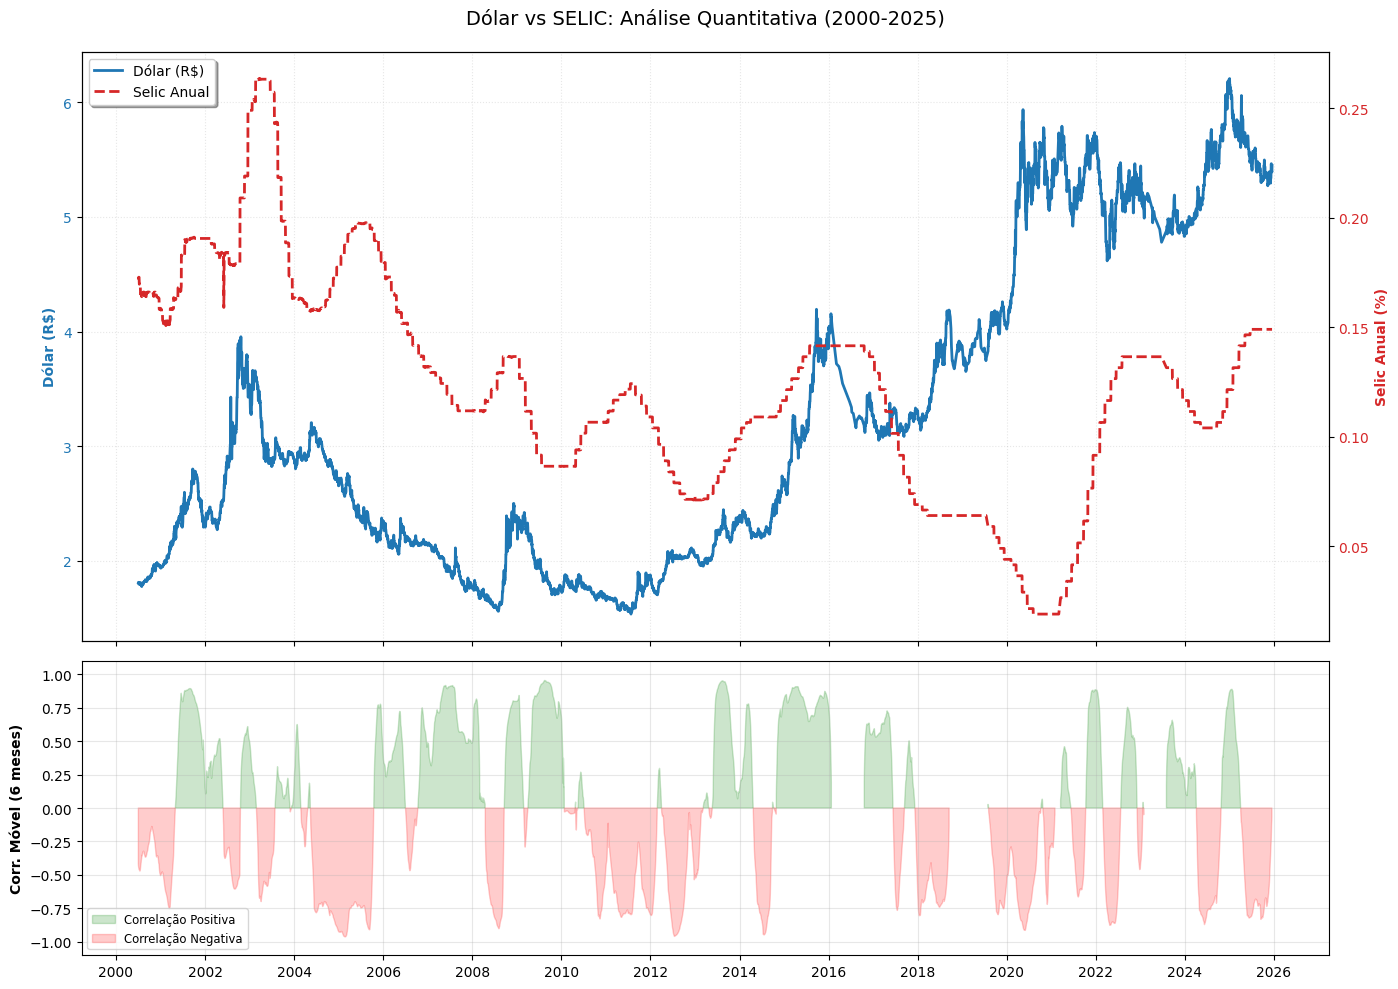

Correlação Histórica Total: -0.2350


In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# --- LIMPEZA DE DADOS (Tratando o 'inf' e 'NaN' que você mencionou) ---
df['corr_selic_dolar'] = df['corr_selic_dolar'].replace([np.inf, -np.inf], np.nan)

# 4. Visualização com Subplots (2 linhas, 1 coluna)
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, 
                               gridspec_kw={'height_ratios': [2, 1]})

# --- GRÁFICO SUPERIOR: DÓLAR VS SELIC ---
ax1.set_ylabel('Dólar (R$)', color='tab:blue', fontweight='bold')
lns1 = ax1.plot(df.index, df['Dólar (PTAX)'], color='tab:blue', lw=2, label='Dólar (R$)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Segundo eixo para a Selic
ax2 = ax1.twinx()
ax2.set_ylabel('Selic Anual (%)', color='tab:red', fontweight='bold')
lns2 = ax2.plot(df.index, df['Selic Anual (%)'], color='tab:red', lw=2, label='Selic Anual', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Legenda unificada para o gráfico superior
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left', frameon=True, shadow=True)
ax1.set_title('Dólar vs SELIC: Análise Quantitativa (2000-2025)', fontsize=14, pad=20)
ax1.grid(alpha=0.3, linestyle=':')

# --- GRÁFICO INFERIOR: CORRELAÇÃO MÓVEL ---
ax3.set_ylabel('Corr. Móvel (6 meses)', fontweight='bold')
# ax3.plot(df.index, df['corr_selic_dolar'], color='black', lw=1.5, label='Correlação (Pearson)')

# Estilização da Correlação: Preenche áreas positivas e negativas
ax3.fill_between(df.index, 0, df['corr_selic_dolar'], where=(df['corr_selic_dolar'] >= 0), 
                 color='green', alpha=0.2, label='Correlação Positiva')
ax3.fill_between(df.index, 0, df['corr_selic_dolar'], where=(df['corr_selic_dolar'] < 0), 
                 color='red', alpha=0.2, label='Correlação Negativa')

# ax3.axhline(0, color='black', lw=1, ls='-') # Linha de referência no zero
ax3.set_ylim(-1.1, 1.1) # Limite padrão da correlação
ax3.grid(alpha=0.3)
ax3.legend(loc='lower left', fontsize='small')

# --- CONFIGURAÇÃO DO EIXO X ---
ax3.xaxis.set_major_locator(mdates.YearLocator(2))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Correlação do período total para referência
print(f"Correlação Histórica Total: {df['Dólar (PTAX)'].corr(df['Selic Anual (%)']):.4f}")

In [55]:
df['corr_selic_dolar'].mean()

np.float64(-0.026137043102572245)

In [56]:
df['corr_selic_dolar']

2000-07-03   -0.413975
2000-07-04   -0.431222
2000-07-05   -0.439459
2000-07-06   -0.444925
2000-07-07   -0.451104
                ...   
2025-12-12   -0.135730
2025-12-13   -0.107291
2025-12-14   -0.092724
2025-12-15   -0.065999
2025-12-16         NaN
Name: corr_selic_dolar, Length: 8585, dtype: float64